In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from collections import Counter
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

In [2]:
# loading the dataset
df = pd.read_csv('/content/credit_card_customer_churn_dataset.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# getting the info. of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
# checking duplicates
df.duplicated().sum()

0

In [5]:
# encoding the categorical features
df = pd.get_dummies(data=df, columns=['Geography', 'Gender'], drop_first=True)

In [6]:
# getting the value count of target; data is imbalanced
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
# creating X & y
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [8]:
# splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [9]:
# handling the imbalance
adas = ADASYN()
X_train, y_train = adas.fit_resample(X_train, y_train)

In [10]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# defining an ANN architecture; shape (10000, 11)
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dropout(rate=.2))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# getting an overall summary of the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dropout (Dropout)           (None, 11)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [14]:
# training
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
206/206 [==============================] - 5s 15ms/step - loss: 0.6081 - accuracy: 0.6492 - val_loss: 0.6982 - val_accuracy: 0.6219
Epoch 2/100
206/206 [==============================] - 2s 8ms/step - loss: 0.5468 - accuracy: 0.7285 - val_loss: 0.5717 - val_accuracy: 0.7534
Epoch 3/100
206/206 [==============================] - 1s 6ms/step - loss: 0.5133 - accuracy: 0.7557 - val_loss: 0.5026 - val_accuracy: 0.7924
Epoch 4/100
206/206 [==============================] - 1s 6ms/step - loss: 0.4956 - accuracy: 0.7679 - val_loss: 0.4589 - val_accuracy: 0.8100
Epoch 5/100
206/206 [==============================] - 1s 6ms/step - loss: 0.4854 - accuracy: 0.7764 - val_loss: 0.4394 - val_accuracy: 0.8131
Epoch 6/100
206/206 [==============================] - 2s 8ms/step - loss: 0.4748 - accuracy: 0.7793 - val_loss: 0.4269 - val_accuracy: 0.8127
Epoch 7/100
206/206 [==============================] - 1s 7ms/step - loss: 0.4700 - accuracy: 0.7797 - val_loss: 0.4438 - val_accuracy: 0.800

In [15]:
# checking the accuracy
y_log = model.predict(X_test)
y_pred = np.where(y_log > 0.5, 1, 0)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

63/63 [==============================] - 0s 1ms/step
Accuracy:  82.5


In [16]:
# getting a CM
confusion_matrix(y_test, y_pred)

array([[1428,  195],
       [ 155,  222]])

In [17]:
# printing a clf report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1623
           1       0.53      0.59      0.56       377

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.73      2000
weighted avg       0.83      0.82      0.83      2000



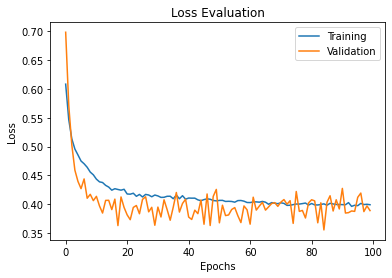

In [18]:
# plotting the loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Evaluation', size=12)
plt.legend();

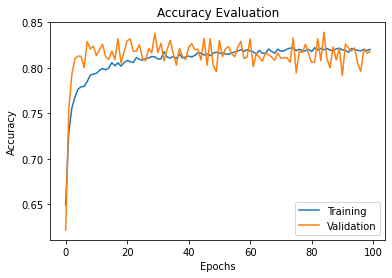

In [19]:
# plotting the accuracy
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evaluation', size=12)
plt.legend();